In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "D:\\new\\Mina CFA\\EGX 30 Historical Data.csv"

In [5]:
# Load the CSV file into a DataFrame
file_path = path
data = pd.read_csv(file_path, parse_dates=True)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/08/2024,"28,750.82","28,628.19","28,971.02","28,488.65",107.59M,0.43%
1,08/07/2024,"28,628.19","28,210.41","28,628.19","28,210.41",110.71M,1.48%
2,08/06/2024,"28,210.41","27,840.64","28,291.84","27,840.64",89.07M,1.33%
3,08/05/2024,"27,840.64","28,503.63","28,503.63","27,125.63",172.98M,-2.33%
4,08/04/2024,"28,503.63","29,359.87","29,359.87","28,262.64",133.32M,-2.92%


In [6]:
price_col = "Price"

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3537 non-null   object
 1   Price     3537 non-null   object
 2   Open      3537 non-null   object
 3   High      3537 non-null   object
 4   Low       3537 non-null   object
 5   Vol.      3510 non-null   object
 6   Change %  3537 non-null   object
dtypes: object(7)
memory usage: 193.6+ KB


In [8]:
data[price_col] = pd.to_numeric(data[price_col].str.replace(",", ""))
# data["Change %"] = pd.to_numeric(data["Change %"])
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,08/08/2024,28750.82,"28,628.19","28,971.02","28,488.65",107.59M,0.43%
1,08/07/2024,28628.19,"28,210.41","28,628.19","28,210.41",110.71M,1.48%
2,08/06/2024,28210.41,"27,840.64","28,291.84","27,840.64",89.07M,1.33%
3,08/05/2024,27840.64,"28,503.63","28,503.63","27,125.63",172.98M,-2.33%
4,08/04/2024,28503.63,"29,359.87","29,359.87","28,262.64",133.32M,-2.92%


In [9]:
def number_transform(text):
    if type(text) == type(""):
        if text.find("M") > 0:
            number = float(text.replace("M", "")) * 1000000.0
            return number
        if text.find("B") > 0:
            number = float(text.replace("B", "")) * 1000000.0 * 1000.0
            return number
        else:
            return float(text)
    else:
        return text

In [10]:
number_transform("10.5M")

10500000.0

In [11]:
data["Vol."] = data["Vol."].apply(number_transform)

In [12]:
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3537 non-null   string 
 1   Price     3537 non-null   Float64
 2   Open      3537 non-null   string 
 3   High      3537 non-null   string 
 4   Low       3537 non-null   string 
 5   Vol.      3510 non-null   Float64
 6   Change %  3537 non-null   string 
dtypes: Float64(2), string(5)
memory usage: 200.5 KB


In [13]:
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y")

In [14]:
# Calculate basic statistical measures on the 'Close' column (assuming it exists in the data)
mean = data[price_col].mean()
median = data[price_col].median()
std_dev = data[price_col].std()
variance = data[price_col].var()
min_value = data[price_col].min()
max_value = data[price_col].max()
percentile_25 = np.percentile(data[price_col], 25)
percentile_75 = np.percentile(data[price_col], 75)
skewness = data[price_col].skew()
kurtosis = data[price_col].kurt()


# Print the calculated statistics
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"25th Percentile: {percentile_25}")
print(f"75th Percentile: {percentile_75}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 10877.185566864573
Median: 10120.95
Standard Deviation: 5424.43625039137
Variance: 29424508.63455998
Minimum: 3586.55
Maximum: 33382.51
25th Percentile: 6708.45
75th Percentile: 13694.99
Skewness: 1.3724183331145279
Kurtosis: 2.211132258709264


In [15]:
# Additional statistical measures
daily_returns = data[price_col].pct_change()
annual_return = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)
sharpe_ratio = annual_return / annual_volatility


print(f"Annual Return: {annual_return}")
print(f"Annual Volatility: {annual_volatility}")
print(f"Sharpe Ratio: {sharpe_ratio}")

Annual Return: -0.08138415377724026
Annual Volatility: 0.23353619293195196
Sharpe Ratio: -0.34848625712141357


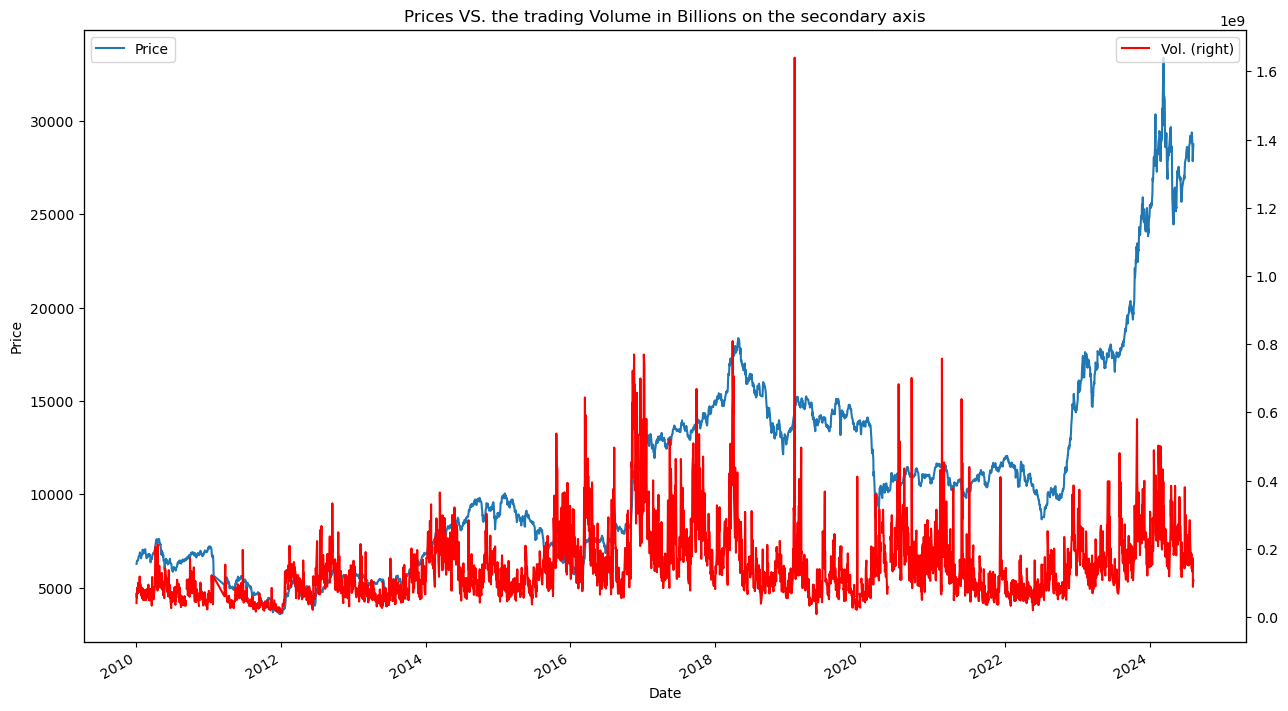

In [35]:
fig, ax = plt.subplots(1, 1)
data.plot(kind="line", x="Date", y=price_col, secondary_y=False, figsize=(15, 9), ax=ax)
# Calculate the moving average for the 'Price' column
ax2 = ax.twinx()
data.plot(kind="line", x="Date", y="Vol.", secondary_y=True, ax=ax2, color="red")
ax.set_ylabel(price_col)
ax2.set_ylabel("Volume")
plt.title("Prices VS. the trading Volume in Billions on the secondary axis")
plt.show()

In [25]:
data["vol_logged"] = data["Vol."].apply(np.log)
data.head()

,Date,Price,Open,High,Low,Vol.,Change %,vol_logged
0,2024-08-08,28750.82,"28,628.19","28,971.02","28,488.65",107590000.0,0.43%,18.493838
1,2024-08-07,28628.19,"28,210.41","28,628.19","28,210.41",110710000.0,1.48%,18.522425
2,2024-08-06,28210.41,"27,840.64","28,291.84","27,840.64",89070000.0,1.33%,18.304933
3,2024-08-05,27840.64,"28,503.63","28,503.63","27,125.63",172980000.0,-2.33%,18.968687
4,2024-08-04,28503.63,"29,359.87","29,359.87","28,262.64",133320000.0,-2.92%,18.708263


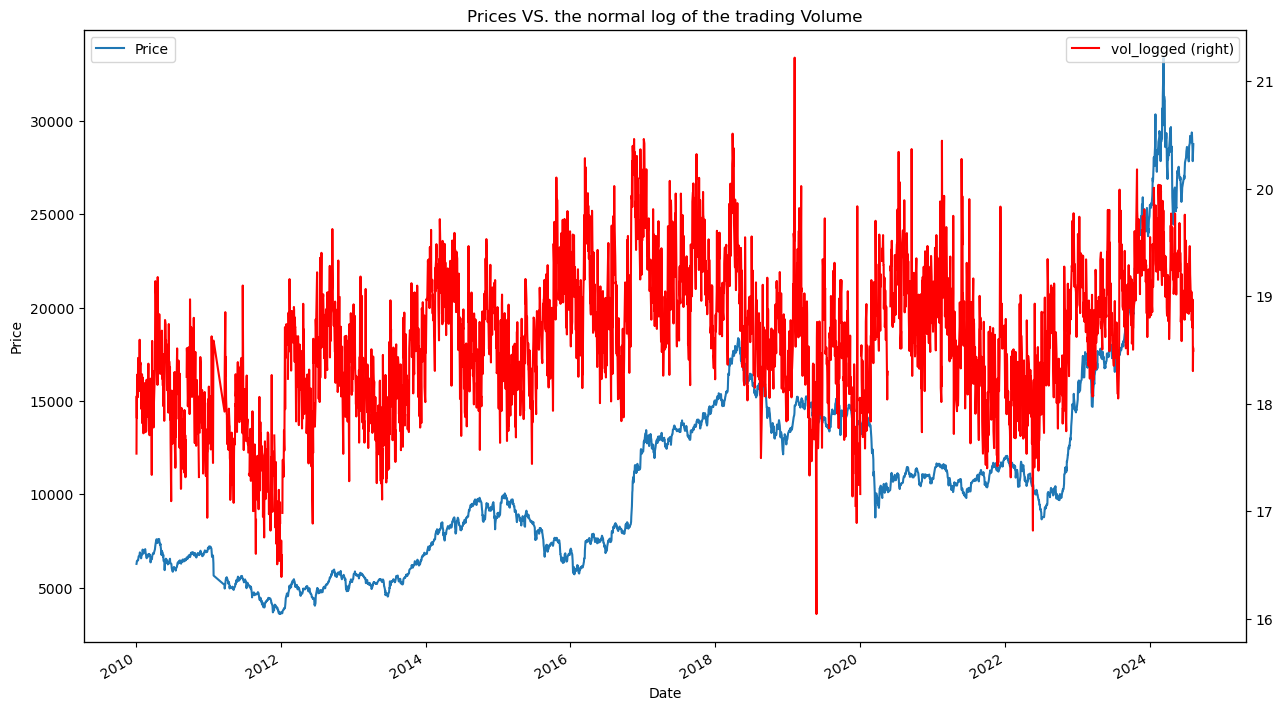

In [32]:
fig, ax = plt.subplots(1, 1)
data.plot(kind="line", x="Date", y=price_col, secondary_y=False, figsize=(15, 9), ax=ax)
ax2 = ax.twinx()
data.plot(kind="line", x="Date", y="vol_logged", secondary_y=True, ax=ax2, color="red")
ax.set_ylabel(price_col)
ax2.set_ylabel("Volume")
plt.title("Prices VS. the normal log of the trading Volume")
plt.show()

In [28]:
# create the moving average for 30 days
window = 30
data["MA"] = data[price_col].rolling(window).mean()

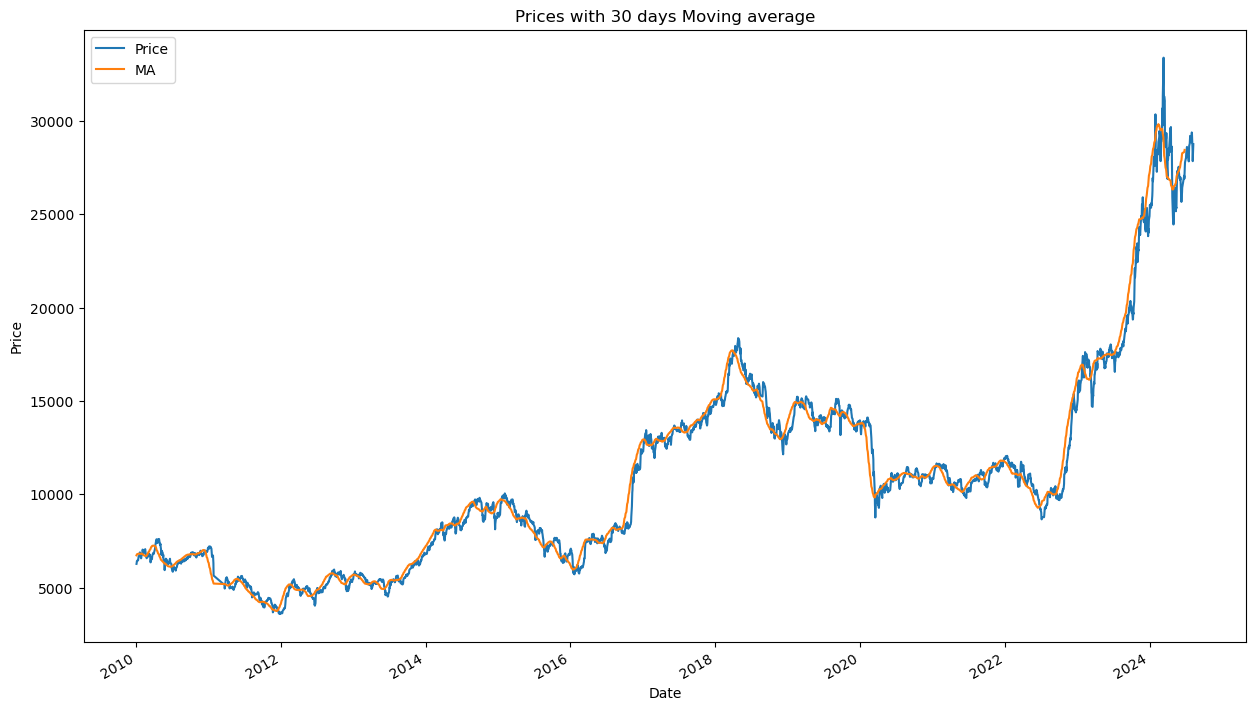

In [31]:
fig, ax = plt.subplots(1, 1)
data.plot(
    kind="line",
    x="Date",
    y=[price_col, "MA"],
    secondary_y=False,
    figsize=(15, 9),
    ax=ax,
)
ax.set_ylabel(price_col)
plt.title(f"Prices with {window} days Moving average")
plt.show()